In [16]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 


In [17]:
file_userdata = 'user_data.csv'
df_user = pd.read_csv(file_userdata)
df_user.info()
df_user.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_id              80 non-null     int64  
 1   Ages                 80 non-null     int64  
 2   Gender               80 non-null     object 
 3   Height               80 non-null     float64
 4   Weight               80 non-null     float64
 5   Bmi                  80 non-null     float64
 6   Disease_Type         80 non-null     object 
 7   Activity_Level       80 non-null     object 
 8   Daily_Calorie        80 non-null     int64  
 9   Food_Recommendation  80 non-null     object 
dtypes: float64(3), int64(3), object(4)
memory usage: 6.4+ KB


,User_id,Ages,Gender,Height,Weight,Bmi,Disease_Type,Activity_Level,Daily_Calorie,Food_Recommendation
0,1,62,ชาย,170.0,85.0,29.4,โรคเบาหวาน,ปานกลาง,1427,น้ำตาลต่ำ
1,2,68,หญิง,155.0,60.0,25.0,โรคความดันโลหิตสูง,น้อย,1081,โซเดียมต่ำ
2,3,61,ชาย,164.0,58.1,21.6,ไม่มี,ปานกลาง,1039,สมดุล
3,4,75,ชาย,152.0,86.8,37.6,โรคความดันโลหิตสูง,น้อย,1314,โซเดียมต่ำ
4,5,70,ชาย,165.0,52.0,19.1,โรคหัวใจ,มาก,794,ไขมันต่ำ
5,6,68,หญิง,170.0,65.0,22.5,โรคหัวใจ,น้อย,1156,ไขมันต่ำ
6,7,65,หญิง,155.0,47.9,19.9,ไม่มี,มาก,884,สมดุล
7,8,72,หญิง,154.1,83.0,35.0,โรคความดันโลหิตสูง,มาก,1164,โซเดียมต่ำ
8,9,69,ชาย,151.0,50.2,22.0,โรคหัวใจ,ปานกลาง,781,ไขมันต่ำ
9,10,74,หญิง,171.0,69.4,23.7,โรคความดันโลหิตสูง,น้อย,1161,โซเดียมต่ำ


In [18]:
file_fooddata = 'food_data.csv'
df_food = pd.read_csv(file_fooddata)
df_food.info()
df_food.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Food_id                   150 non-null    int64  
 1   Food_Name                 150 non-null    object 
 2   ปริมาณ                    150 non-null    object 
 3   Category                  150 non-null    object 
 4   Energy (kcal)             150 non-null    int64  
 5   Protein (g)               150 non-null    float64
 6   Carbohydrates (g)         150 non-null    float64
 7   Sugars (g)                150 non-null    float64
 8   Fat (g)                   150 non-null    float64
 9   Sodium (mg)               150 non-null    float64
 10  Food_Type                 150 non-null    object 
 11  Suitable For Disease      150 non-null    object 
 12  Food Type Not suitable    59 non-null     object 
 13  Not suitable for disease  59 non-null     object 
dtypes: float64

,Food_id,Food_Name,ปริมาณ,Category,Energy (kcal),Protein (g),Carbohydrates (g),Sugars (g),Fat (g),Sodium (mg),Food_Type,Suitable For Disease,Food Type Not suitable,Not suitable for disease
0,1,กล้วยไข่,100 g,ผลไม้,107,1.35,24.30,21.50,0.11,22.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,น้ำตาลสูง,โรคเบาหวาน
1,2,กล้วยน้ำว้า,100 g,ผลไม้,118,0.78,27.18,18.47,0.15,4.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,NaN,NaN
2,3,แก้วมังกร,100 g,ผลไม้,56,1.30,10.30,9.30,0.70,4.0,น้ำตาลต่ำ,โรคเบาหวาน,NaN,NaN
3,4,ขนุน,100 g,ผลไม้,101,1.55,21.73,19.17,0.42,26.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,น้ำตาลสูง,โรคเบาหวาน
4,5,แคนตาลูป,100 g,ผลไม้,28,0.50,5.70,10.00,0.10,6.0,น้ำตาลต่ำ,โรคเบาหวาน,NaN,NaN
5,6,ฝรั่ง,100 g,ผลไม้,68,2.60,14.00,9.00,1.00,2.0,น้ำตาลต่ำ,โรคเบาหวาน,NaN,NaN
6,7,เงาะ,100 g,ผลไม้,77,0.97,17.92,0.00,0.14,14.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,NaN,NaN
7,8,ชมพู่,100 g,ผลไม้,31,0.46,6.74,0.00,0.04,66.0,น้ำตาลต่ำ,โรคเบาหวาน,NaN,NaN
8,9,แตงโม,100 g,ผลไม้,37,0.81,8.07,8.15,0.07,4.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,ดัชนีน้ำตาลสูง,โรคเบาหวาน
9,10,ทุเรียน,100 g,ผลไม้,140,2.26,23.81,14.75,3.34,11.0,สมดุล,ผู้สูงอายุที่ไม่มีโรคประจำตัว,NaN,NaN


In [19]:
print("-----------ข้อมูลผู้ใช้-----------")
print(df_user.Gender.unique())
print(df_user.Disease_Type.unique())
print(df_user.Activity_Level.unique())
print(df_user.Food_Recommendation.unique())


print("-----------ข้อมูลอาหาร-----------")
print(df_food.Category.unique())
print(df_food.Food_Type.unique())

-----------ข้อมูลผู้ใช้-----------
['ชาย' 'หญิง']
['โรคเบาหวาน' 'โรคความดันโลหิตสูง' 'ไม่มี' 'โรคหัวใจ'
 'โรคเบาหวาน,โรคความดันโลหิตสูง' 'โรคเบาหวาน,โรคหัวใจ'
 'โรคความดันโลหิตสูง,โรคหัวใจ' 'โรคเบาหวาน,โรคความดันโลหิตสูง,โรคหัวใจ']
['ปานกลาง' 'น้อย' 'มาก']
['น้ำตาลต่ำ' 'โซเดียมต่ำ' 'สมดุล' 'ไขมันต่ำ' 'น้ำตาลต่ำ+โซเดียมต่ำ'
 'น้ำตาลต่ำ+ไขมันต่ำ' 'โซเดียมต่ำ+ไขมันต่ำ'
 'น้ำตาลต่ำ+โซเดียมต่ำ+ไขมันต่ำ']
-----------ข้อมูลอาหาร-----------
['ผลไม้' 'เครื่องดื่ม' 'ฟาสต์ฟู้ด' 'ขนม' 'อาหารจานหลัก']
['สมดุล' 'น้ำตาลต่ำ' 'ไขมันต่ำ' 'โซเดียมต่ำ']


In [20]:
df_user['Gender'] = df_user.Gender.replace(['ชาย','หญิง'],[1,2])
df_user['Disease_Type'] = df_user.Disease_Type.replace(['ไม่มี','โรคเบาหวาน','โรคความดันโลหิตสูง','โรคหัวใจ','โรคเบาหวาน,โรคความดันโลหิตสูง','โรคเบาหวาน,โรคหัวใจ','โรคความดันโลหิตสูง,โรคหัวใจ','โรคเบาหวาน,โรคความดันโลหิตสูง,โรคหัวใจ'],[0,1,2,3,4,5,6,7])
df_user['Activity_Level'] = df_user.Activity_Level.replace(['น้อย','ปานกลาง','มาก'],[1,2,3])
df_user['Food_Recommendation'] = df_user.Food_Recommendation.replace(['สมดุล','น้ำตาลต่ำ','โซเดียมต่ำ','ไขมันต่ำ','น้ำตาลต่ำ+โซเดียมต่ำ','น้ำตาลต่ำ+ไขมันต่ำ','โซเดียมต่ำ+ไขมันต่ำ','น้ำตาลต่ำ+โซเดียมต่ำ+ไขมันต่ำ'],[0,1,2,3,4,5,6,7])



# df_food['Category'] = df_food.Category.replace(['ผลไม้', 'เครื่องดื่ม' ,'ฟาสต์ฟู้ด' ,'ขนม' ,'อาหารจานหลัก'],[0,1,2,3,4])
df_food['Food_Type'] = df_food.Food_Type.replace(['สมดุล','น้ำตาลต่ำ','โซเดียมต่ำ','ไขมันต่ำ'],[0,1,2,3])

C:\Users\User\AppData\Local\Temp\ipykernel_7832\2539377442.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_user['Gender'] = df_user.Gender.replace(['ชาย','หญิง'],[1,2])
C:\Users\User\AppData\Local\Temp\ipykernel_7832\2539377442.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_user['Disease_Type'] = df_user.Disease_Type.replace(['ไม่มี','โรคเบาหวาน','โรคความดันโลหิตสูง','โรคหัวใจ','โรคเบาหวาน,โรคความดันโลหิตสูง','โรคเบาหวาน,โรคหัวใจ','โรคความดันโลหิตสูง,โรคหัวใจ','โรคเบาหวาน,โรคความดันโลหิตสูง,โรคหัวใจ'],[0,1,2,3,4,5,6

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


df_user = df_user.drop(columns=['Daily_Calorie'], errors='ignore')

# แยก features และ labels
x = df_user[['Ages', 'Gender', 'Height','Weight','Bmi', 'Disease_Type','Activity_Level']]
y = df_user['Food_Recommendation']

# แบ่งเป็น Train 70% และ Temp 30%
X_train, X_temp, y_train, y_temp = train_test_split(x, y, train_size=0.7, random_state=42)

# แบ่ง Temp ออกเป็น Validation 15% และ Test 15%
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# แสดงจำนวนข้อมูลในแต่ละชุด
print('---------Train---------')
print(X_train.shape)
print('---------Validation---------')
print(X_valid.shape)
print('---------Test---------')
print(X_test.shape)

# สร้างและฝึกโมเดลด้วยข้อมูล Train
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# ประเมินผลด้วยชุด Validation
y_valid_pred = clf.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print('---------Validation Accuracy---------')
print(f"\nAccuracy: {valid_accuracy:.2f}")
print("Classification Report (Validation):\n", classification_report(y_valid, y_valid_pred, zero_division=1))

# ทดสอบโมเดลด้วยชุด Test
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('---------Test Accuracy---------')
print(f"\nAccuracy: {test_accuracy:.2f}")
print("Classification Report (Test):\n", classification_report(y_test, y_pred, zero_division=1))

# แสดงข้อมูลชุดทดสอบ
print("---------------------ข้อมูลที่ใช้เทส----------------------")
print("Disease_Type:\n0 = ไม่มีโรค\n1 = โรคเบาหวาน\n2 = โรคความดันโลหิตสูง\n3 = โรคหัวใจ\n4 = เบาหวาน+ความดัน\n5 = เบาหวาน+หัวใจ\n6 = ความดัน+หัวใจ\n7 = เบาหวาน+ความดัน+หัวใจ")
print("---------------------------------------------------------")
print(X_test)

# แสดงผลการทำนาย
print("---------------------ผลการทำนาย----------------------")
print("Food recommend:\n0 = สมดุล\n1 = น้ำตาลต่ำ\n2 = โซเดียมต่ำ\n3 = ไขมันต่ำ\n4 = น้ำตาล+โซเดียมต่ำ\n5 = น้ำตาล+ไขมันต่ำ\n6 = โซเดียม+ไขมันต่ำ\n7 = น้ำตาล+โซเดียม+ไขมันต่ำ")
print("Food recommend: ", y_pred)
print("---------------------------------------------------------")




---------Train---------
(56, 7)
---------Validation---------
(12, 7)
---------Test---------
(12, 7)
---------Validation Accuracy---------

Accuracy: 1.00
Classification Report (Validation):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

---------Test Accuracy---------

Accuracy: 1.00
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00 

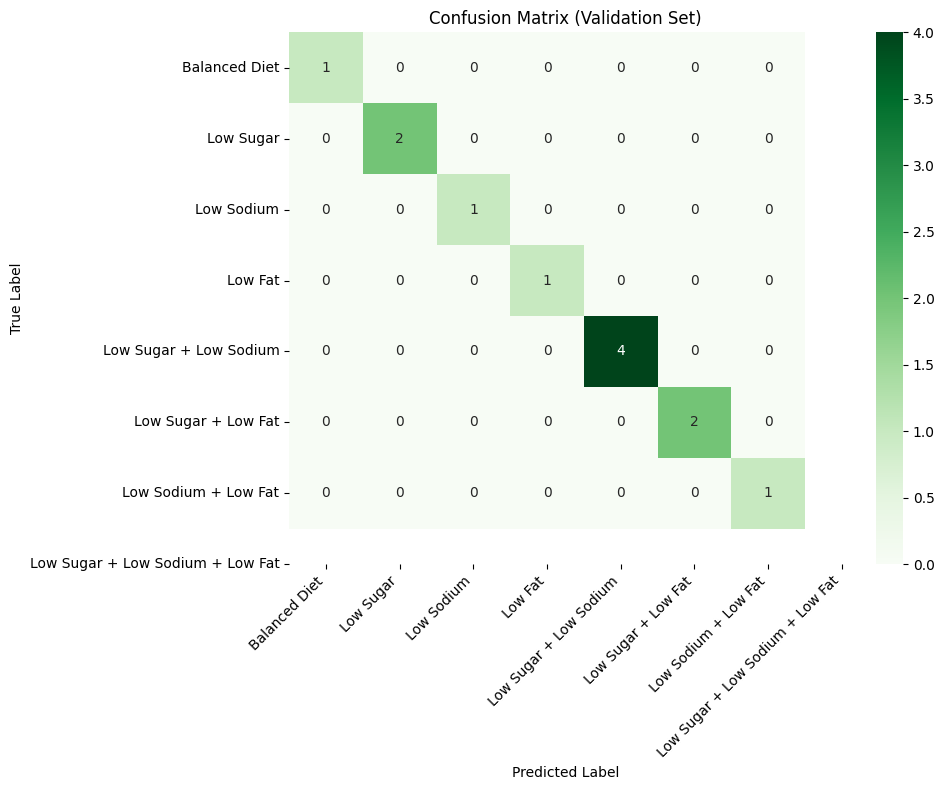

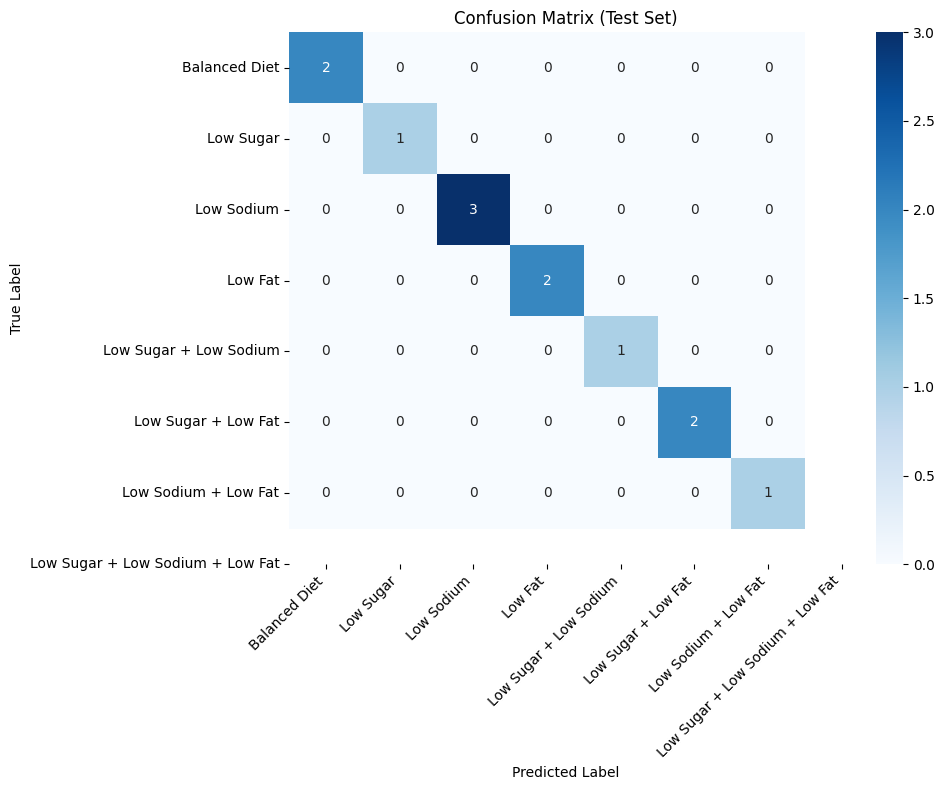

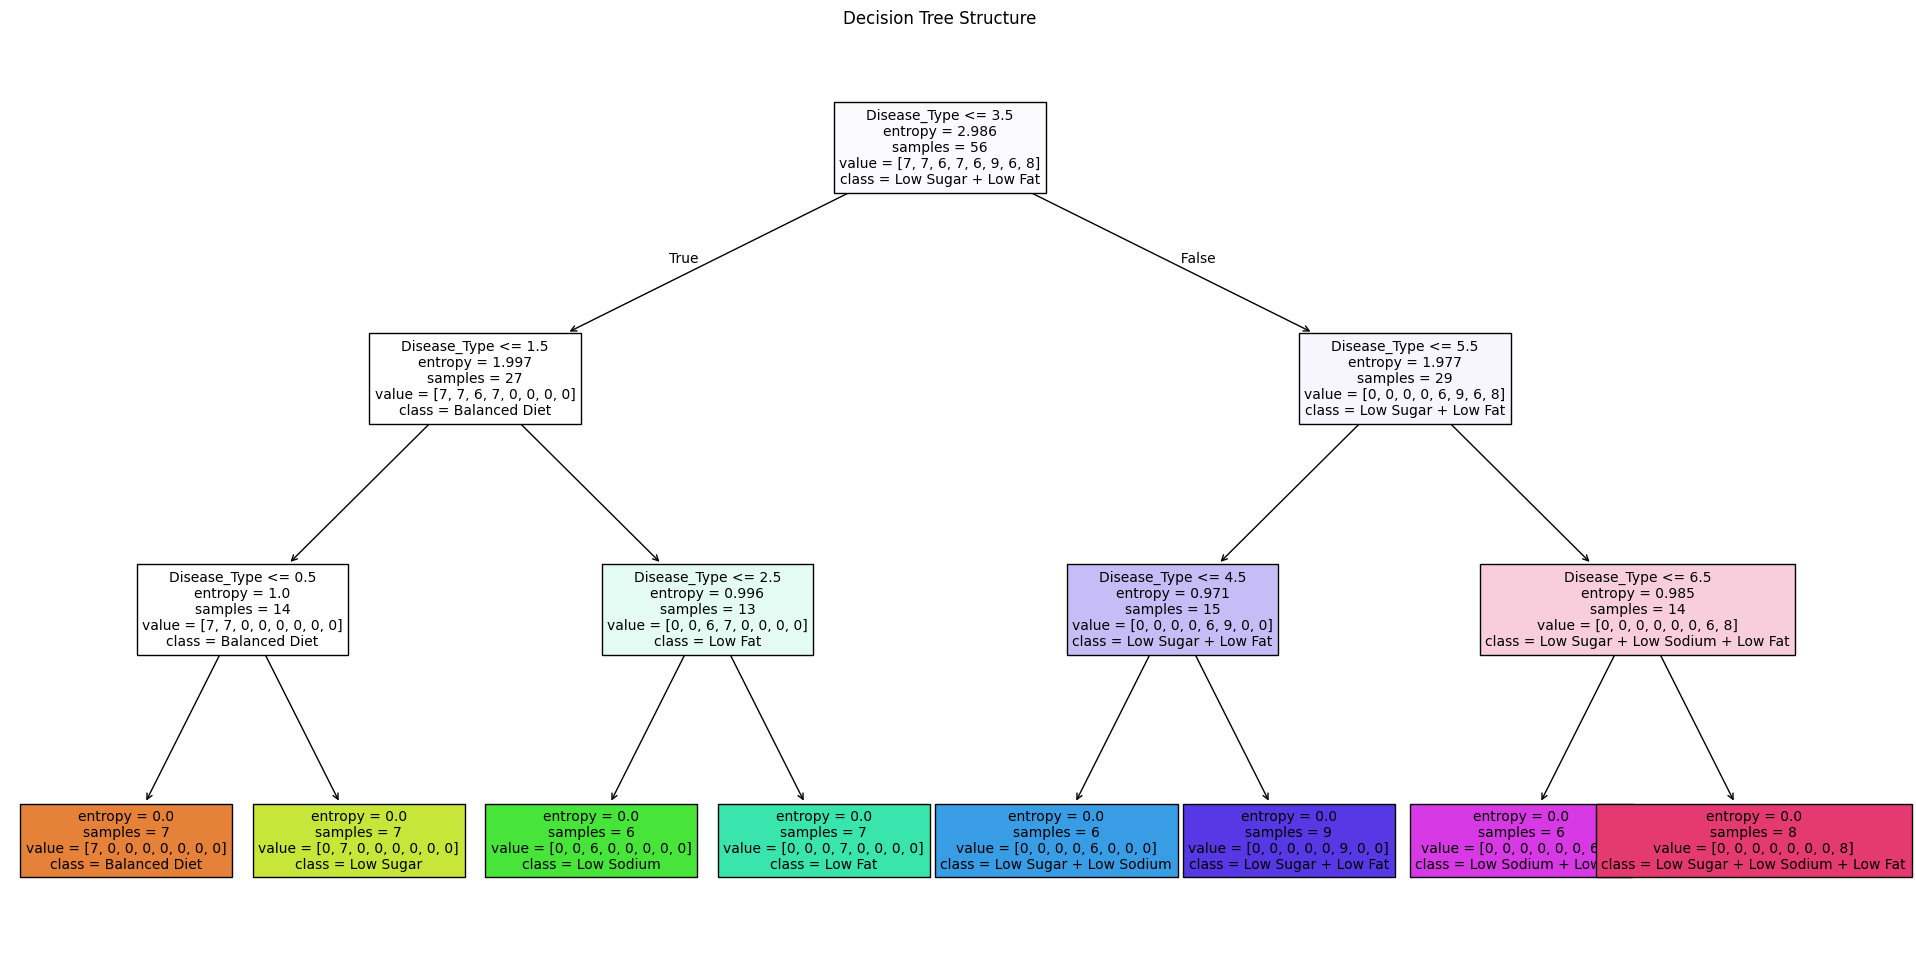

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Class labels for food recommendation
class_labels = [
    "Balanced Diet",
    "Low Sugar",
    "Low Sodium",
    "Low Fat",
    "Low Sugar + Low Sodium",
    "Low Sugar + Low Fat",
    "Low Sodium + Low Fat",
    "Low Sugar + Low Sodium + Low Fat"
]

# ---------- Confusion Matrix: Validation ----------
cm_valid = confusion_matrix(y_valid, y_valid_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ---------- Confusion Matrix: Test ----------
cm_test = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Set)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ---------- Decision Tree Structure ----------
plt.figure(figsize=(24, 12))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=class_labels, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()





In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# ===============================
# รับ Input
# ===============================
print("\n🎯 กรุณากรอกข้อมูลสุขภาพของคุณ 🎯")

age = int(input("📌 อายุของคุณ: "))

# เลือกเพศ
gender_map = {1: "ชาย", 2: "หญิง"}
gender_choice = int(input("📌 เลือกเพศของคุณ (1: ชาย, 2: หญิง): "))
gender = gender_map.get(gender_choice, "ชาย")

# รับส่วนสูงและน้ำหนัก พร้อมคำนวณ BMI
height = float(input("📌 ส่วนสูง (cm): "))
weight = float(input("📌 น้ำหนัก (kg): "))
bmi = weight / ((height / 100) ** 2)

# เลือกโรคหลายโรคได้
print("📌 เลือกโรคประจำตัวของคุณ (0. ไม่มีโรค, 1. โรคเบาหวาน, 2. โรคความดันโลหิตสูง, 3. โรคหัวใจ, 4. โรคเบาหวาน + โรคความดันโลหิตสูง, 5. โรคเบาหวาน + โรคหัวใจ, 6. โรคความดันโลหิตสูง + โรคหัวใจ, 7. โรคเบาหวาน + โรคความดันโลหิตสูง + โรคหัวใจ)")
print("   0. ไม่มีโรค")
print("   1. โรคเบาหวาน")
print("   2. โรคความดันโลหิตสูง")
print("   3. โรคหัวใจ")
print("   4. โรคเบาหวาน + โรคความดันโลหิตสูง")
print("   5. โรคเบาหวาน + โรคหัวใจ")
print("   6. โรคความดันโลหิตสูง + โรคหัวใจ")
print("   7. โรคเบาหวาน + โรคความดันโลหิตสูง + โรคหัวใจ")

disease_choices = input("กรุณาเลือกหมายเลขที่ตรงกับโรคของคุณ: ")

# แปลงเป็นตัวเลข
# disease_list = [int(x) for x in disease_choices.split(",") if x.isdigit()]

# # ถ้าไม่มีโรคเลย กำหนดเป็น "ไม่มีโรค"
# if len(disease_list) == 1 and disease_list[0] == 1:
#     disease_encoded = [0]  # ไม่เลือกโรค
# else:
#     disease_encoded = [x - 1 for x in disease_list if x > 1]  # ลดค่าลง 1 (ให้สอดคล้องกับ df)

# เลือกระดับกิจกรรม
activity_map = {1: "น้อย", 2: "ปานกลาง", 3: "มาก"}
activity_choice = int(input("📌 เลือกระดับกิจกรรมของคุณ (1: น้อย, 2: ปานกลาง, 3: มาก): "))
activity = activity_map.get(activity_choice, "น้อย")

# คำนวณพลังงาน
bmr_base = 66 if gender == "ชาย" else 655
bmr_weight = 13.7 if gender == "ชาย" else 9.6
bmr_height = 5 if gender == "ชาย" else 1.8
bmr_age = 6.8 if gender == "ชาย" else 4.7

bmr = bmr_base + (bmr_weight * weight) + (bmr_height * height) - (bmr_age * age)
activity_multiplier = {"น้อย": 1.375, "ปานกลาง": 1.55, "มาก": 1.7}
daily_calorie = bmr * activity_multiplier[activity]

# แปลงค่าตัวแปร Gender, Activity_Level
gender_encoded = 1 if gender == "ชาย" else 2
activity_encoded = {"น้อย": 1, "ปานกลาง": 2, "มาก": 3}[activity]

# สร้างข้อมูลใหม่ (กำหนดค่า Disease_Type ให้เป็นค่ารวมของโรค)
new_user = pd.DataFrame({
    "Ages": [age],
    "Gender": [gender_encoded],
    "Height": [height],
    "Weight": [weight],
    "Bmi": [bmi],
    "Disease_Type": [disease_choices], 
    "Activity_Level": [activity_encoded]
})

# ===============================
# ทำนาย+แนะนำอาหาร
# ===============================
predicted_menu_code = clf.predict(new_user)[0]

# ===============================
# Mapping สำหรับประเภทอาหาร
# ===============================
food_mapping = {
    0: [0],       # ไม่มีโรค
    1: [1],       # โรคเบาหวาน
    2: [2],       # โรคความดันโลหิตสูง
    3: [3],       # โรคหัวใจ
    4: [1, 2],    # โรคเบาหวาน + โรคความดันโลหิตสูง
    5: [1, 3],    # โรคเบาหวาน + โรคหัวใจ
    6: [2, 3],    # โรคความดันโลหิตสูง + โรคหัวใจ
    7: [1, 2, 3]  # โรคเบาหวาน + โรคความดันโลหิตสูง + โรคหัวใจ
}


# ===============================
# ทำนาย+แนะนำอาหาร
# ===============================
food_code_mapping = food_mapping.get(predicted_menu_code, []) 

food_types = []
for disease in food_code_mapping:
    food_types.extend(food_mapping.get(disease, []))

recommended_foods = df_food[df_food["Food_Type"].isin(food_types)]

# แสดงผลลัพธ์
print('========================================')
print('\nข้อมูลสุขภาพของคุณ')
print('========================================')
print("คุณเป็นเพศ:", gender)
print("คุณอายุ:", age)
print("คุณสูง:", height, "ซม.")
print("คุณน้ำหนัก:", weight, "กก.")
print(f"BMI ของคุณ: {bmi:.2f}")
print("คุณมีโรค:", disease_choices)
print("ระดับกิจกรรมของคุณ:", activity)
print(f"พลังงานที่คุณควรได้รับ/วัน: {int(daily_calorie)} กิโลแคลอรี")

print('========================================')
print("\n🍽 เมนูที่เหมาะสมสำหรับคุณ:", predicted_menu_code)
print("✅ เมนูแนะนำ:")

if not recommended_foods.empty:
    for index, row in recommended_foods.iterrows():
        print(f"- {row['Food_Name']} (พลังงาน {row['Energy (kcal)']} kcal, โปรตีน {row['Protein (g)']}g, คาร์โบไฮเดรต {row['Carbohydrates (g)']}g, น้ำตาล {row['Sugars (g)']}g, ไขมัน {row['Fat (g)']}g, โซเดียม {row['Sodium (mg)']}mg)")
else:
    print("❌ ไม่พบเมนูอาหารที่เหมาะสม กรุณาตรวจสอบข้อมูลในฐานข้อมูล")





🎯 กรุณากรอกข้อมูลสุขภาพของคุณ 🎯
📌 เลือกโรคประจำตัวของคุณ (0. ไม่มีโรค, 1. โรคเบาหวาน, 2. โรคความดันโลหิตสูง, 3. โรคหัวใจ, 4. โรคเบาหวาน + โรคความดันโลหิตสูง, 5. โรคเบาหวาน + โรคหัวใจ, 6. โรคความดันโลหิตสูง + โรคหัวใจ, 7. โรคเบาหวาน + โรคความดันโลหิตสูง + โรคหัวใจ)
   0. ไม่มีโรค
   1. โรคเบาหวาน
   2. โรคความดันโลหิตสูง
   3. โรคหัวใจ
   4. โรคเบาหวาน + โรคความดันโลหิตสูง
   5. โรคเบาหวาน + โรคหัวใจ
   6. โรคความดันโลหิตสูง + โรคหัวใจ
   7. โรคเบาหวาน + โรคความดันโลหิตสูง + โรคหัวใจ

ข้อมูลสุขภาพของคุณ
คุณเป็นเพศ: หญิง
คุณอายุ: 63
คุณสูง: 156.0 ซม.
คุณน้ำหนัก: 63.0 กก.
BMI ของคุณ: 25.89
คุณมีโรค: 4
ระดับกิจกรรมของคุณ: น้อย
พลังงานที่คุณควรได้รับ/วัน: 1711 กิโลแคลอรี

🍽 เมนูที่เหมาะสมสำหรับคุณ: 4
✅ เมนูแนะนำ:
- แก้วมังกร (พลังงาน 56 kcal, โปรตีน 1.3g, คาร์โบไฮเดรต 10.3g, น้ำตาล 9.3g, ไขมัน 0.7g, โซเดียม 4.0mg)
- แคนตาลูป (พลังงาน 28 kcal, โปรตีน 0.5g, คาร์โบไฮเดรต 5.7g, น้ำตาล 10.0g, ไขมัน 0.1g, โซเดียม 6.0mg)
- ฝรั่ง (พลังงาน 68 kcal, โปรตีน 2.6g, คาร์โบไฮเดรต 14.0g, น้ำตาล 9.0g, ไขมั

In [24]:
import joblib

# บันทึกโมเดล
# joblib.dump(clf, 'food_recommendation_model.pkl')
# print("\n🎉 บันทึกโมเดลสำเร็จ! (food_recommendation_model.pkl)")